# CH55 and CH62 Mantiude Percentile lightcurves 

In [ ]:
from analysis import *
import h5py
from astropy.convolution import convolve, Box1DKernel
import sys

In [2]:
import richardsplot

In [3]:
campaign = 8

all_targets = pd.read_csv("/home/jackeline/Research/k2_pipeline/K2_official_targets/K2Campaign%stargets.csv"%campaign, skipinitialspace=True)
#plt.hist(all_targets.magnitude.)
epic = int(220148939)
mag = all_targets.magnitude[all_targets['EPIC ID'] == epic].values[0]
mag

17.945

In [7]:
def chLC(channel):
    campaign = 8
    mod,submod = get_submod(channel)
    submod-=1 # submods are 0-3 in the hdf5 file

    #hdf5_file = "/Users/rachelbuttry/K2/K2C%s_target_pixels.hdf5"%campaign
    hdf5_file = "/home/jackeline/Research/k2_pipeline/k2_LongTermSystematics/data/pixelmaps/k2pixelmap.hdf5"

    # there are 23117 objects in the campaign 8 hdf5 file
    # there are 3853 cadence points in c8
    cadences = 3853
    time = np.arange(cadences)/48.0

    with h5py.File(hdf5_file, 'r') as f:
        channel_epics = np.array(list(f['%s/%s/%s'%(campaign, mod,submod)].keys()))# look at objects in given channel).astype(int)

        # need the kepler magnitudes
        #all_targets = pd.read_csv("./K2_official_targets/K2Campaign%stargets.csv"%campaign, skipinitialspace=True)
    all_targets = pd.read_csv("/home/jackeline/Research/k2_pipeline/K2_official_targets/K2Campaign%stargets.csv"%campaign, skipinitialspace=True)


    # saving lcs to take the median
    arr = []
    arrmu = []
    arrmuF = []

    with h5py.File(hdf5_file, 'r') as f:
        channel_epics = np.array(list(f['%s/%s/%s'%(campaign, mod, submod)].keys()))# look at objects in given channel).astype(int)

        #rel_epics = channel_epics[np.isin(channel_epics, all_targets['EPIC ID'][np.logical_and(all_targets['magnitude'] > 13, all_targets['magnitude'] < 20)])]
        rel_epics = channel_epics[np.isin(channel_epics, all_targets['EPIC ID'][np.logical_and(all_targets['magnitude'] > 13, all_targets['magnitude'] < 100)])]

            #print(len(rel_epics))

        # loop thru the objects
        for epic in rel_epics:
            #print(epic)

            d = np.array(f['%s/%s/%s/%s'%(campaign, mod, submod, epic)]['data'])
            mag = all_targets.magnitude[all_targets['EPIC ID'] == int(epic)].values[0]

            lc_hdf5 = np.nansum(np.nansum(d, axis=1), axis=1)

                # handle spurious cadences
            lc = lk.LightCurve(time, flux=lc_hdf5)
            _, spurious_cad = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
            lc_raw = lc.flux

            # interpolate
            cadno = np.arange(len(lc_raw)) # get an array to serve as our time/cadence measurement
            interped_vals = np.interp(cadno[spurious_cad], cadno[~spurious_cad], lc_raw[~spurious_cad])
            # replace spurious cadence values with the interpolated values
            lc_raw[spurious_cad] = interped_vals
            norm = np.mean(lc_raw)
            lc_raw -= np.mean(lc_raw)
            lc_raw = lc_raw/norm
            #lc_raw = lc_raw/np.max(np.abs(lc_raw))

            smooth = convolve(lc_raw, Box1DKernel(350), boundary='extend')

            arr.append(lc_raw)
            arrmu.append(mag)
            arrmuF.append(norm)
        all_targets['magnitude']
        return arr, arrmu, arrmuF

In [10]:

#get lightcurve stack for each channel
arr55, arrmu55, arrmuF55 = chLC(55)
arr62, arrmu62, arrmuF62 = chLC(62)

In [11]:
arrmuF62

[827.0845,
 11513.188,
 85824.266,
 765.8365,
 1816.3865,
 85524.28,
 42080.14,
 37128.15,
 5132.139,
 73826.62,
 15840.984,
 47350.715,
 62996.348,
 2510.013,
 77913.55,
 12746.072,
 6403.5527,
 13520.434,
 5972.742,
 2904.3398,
 50438.96,
 85117.984,
 89782.78,
 48065.76,
 5658.9204,
 9983.112,
 12365.496,
 21041.79,
 4918.101,
 935.76483,
 2572.4126,
 16846.258,
 17792.89,
 2804.127,
 55570.293,
 7259.731,
 655.2071,
 60947.273,
 6804.2563,
 3695.6023,
 1114.7207,
 56441.77,
 3712.336,
 5627.2256,
 44880.32,
 73455.76,
 2389.28,
 5780.9287,
 768.2288,
 61642.11,
 3894.8047,
 2491.9114,
 54602.133,
 26870.096,
 3105.5376,
 51352.516,
 668.7634,
 75271.914,
 4725.3555,
 4077.9343,
 67563.63,
 13009.601,
 78807.31,
 1401.8678,
 70488.016,
 2961.6243,
 60022.35,
 40779.703,
 1708.9368,
 982.2147,
 1138.833,
 1126.7446,
 42711.445,
 3352.1113,
 63862.516,
 27030.611,
 365.14847,
 50572.598,
 51641.133,
 1116.9628,
 455.09604,
 1661.3497,
 106609.5,
 2443.744,
 32959.9,
 7858.4126,
 1632.

ch5
18.388199999999998
79365.24257812499
18.1192
64920.434375
17.7928
59368.564062499994
16.99625
43509.7021484375
15.576
8052.4794921875
14.014750000000001
2205.8287963867188
13.551449999999999
1186.4333557128907
ch62
18.4771
80434.67070312495
17.927100000000003
63780.16953125
17.5273
54940.988867187494
16.78075
43253.6640625
15.69
7409.27587890625
13.928000000000003
2641.9701538085938
13.541900000000002
1604.2656127929686


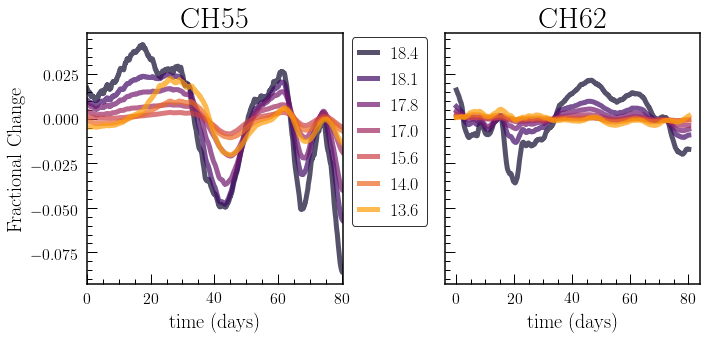

In [13]:



#colors for percentile lightcurves
cmap = plt.get_cmap('inferno')
mag_colors = np.zeros((len(cmap.colors),4))
mag_colors[:,3] = 0.7 #this is the alpha parameter
mag_colors[:,:3] = cmap.colors
    
cadences = 3853
time = np.arange(cadences)/48.0   
    
f, [ax1,ax2] = plt.subplots(1,2,figsize=(10,5), sharey = True)
print("ch5")    

zz = 10
#channel55 plot
for p in [5, 10,15, 25, 50, 75, 85]:
    flux = np.percentile(np.atleast_2d(np.array(arr55)),p, axis=0)
    mu55 = np.percentile(arrmu55, 100-p)
    print(mu55)
    print(np.percentile(arrmuF55, 100-p))

    flux_smooth = convolve(flux, Box1DKernel(250), boundary='extend')
    ax1.plot(time, flux_smooth-flux_smooth.mean(), linewidth=5, color =mag_colors[zz*2], label =  "{:.1f}".format(mu55)) 
    zz +=15
    
print("ch62")    
zz = 10
#channel 62 plot
for p in [5, 10,15, 25, 50, 75, 85]:
    flux = np.percentile(np.atleast_2d(np.array(arr62)),p, axis=0)
    flux_smooth = convolve(flux, Box1DKernel(250), boundary='extend')
    mu62 = np.percentile(arrmu62, 100-p)
    print(mu62)
    print(np.percentile(arrmuF62, 100-p))
    #muMag = keplerflux_to_keplermag(mu62)
    ax2.plot(time, flux_smooth-flux_smooth.mean(), linewidth=5, color =mag_colors[zz*2] , label = "{:.1f}".format(mu62))
    zz +=15 


ax1.set_title( "CH55", fontsize = 30)
ax2.set_title( "CH62", fontsize = 30)

ax1.set_xlim(np.min(time), np.max(time))
ax1.set_xlabel("time (days)", fontsize = 20)
ax2.set_xlabel("time (days)", fontsize = 20)
ax1.set_ylabel(r"Fractional Change", fontsize = 20)
#ax2.legend(fontsize = 16, handlelength = 1)
ax1.legend( handlelength = 1, fontsize=18, bbox_to_anchor=(1.0, 1.02), edgecolor='k', loc=2, labelspacing=0.45)


plt.tight_layout()
#plt.savefig("/home/jackeline/Research/k2_pipeline/k2_paperFigures/fig10.pdf",dpi = 200 ,transparent=False)